In [1]:
library(tidyverse)
library(ggplot2)
library(wordcloud)
library(Cairo)
library(readxl)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: RColorBrewer


In [2]:
d=read_delim("../../../ontology_enrichment/analysis//significantly_enriched_terms.DEK1_targets.Benjamini-Hochberg.txt",delim="\t",col_types=cols())
head(d)


group        set        method             cutoff ontology ID        
1 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0000271
2 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0000910
3 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0003824
4 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0003899
5 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0005576
6 DEK1_targets background Benjamini-Hochberg 0.1    GO       GO:0005829
  Pop.total Pop.term Study.total Study.term ⋯ is.trivial p           
1 27456       731    24022        624       ⋯ FALSE      9.620646e-05
2 27456       273    24022        245       ⋯ FALSE      4.015830e-05
3 27456     10423    24022       8966       ⋯ FALSE      1.440802e-09
4 27456       137    24022        129       ⋯ FALSE      2.039552e-07
5 27456      4514    24022       4094       ⋯ FALSE      3.136877e-14
6 27456      9834    24022       8670       ⋯ FALSE      1.732447e-08
  p.adjusted   p.min         depth ic       partition         
1 2.798646e-02  0.000000e+00 11    6.140708 biological_process
2 1.401846e-02 4.221749e-267  5    5.795868 biological_process
3 2.102398e-06  0.000000e+00  1    1.722104 molecular_function
4 1.779917e-04 2.501214e-240 29    7.875309 molecular_function
5 1.368776e-10  0.000000e+00  1    5.447561 cellular_component
6 1.679897e-05  0.000000e+00  7    5.809854 cellular_component
  level3                    name                                      
1 primary metabolic process polysaccharide biosynthetic process       
2 cell cycle                cytokinesis                               
3 NA                        catalytic activity                        
4 transferase activity      DNA-directed 5'-3' RNA polymerase activity
5 NA                        extracellular region                      
6 cell part                 cytosol                                   
  loci                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [3]:
d=d %>% filter( ontology != "TO") %>% 
    filter(group %in% c("final_DEK1_targets_direction","final_DEK1_targets") & set != "background")
d=droplevels(d)

In [4]:
G=d %>% separate_rows(loci,sep=",")

In [5]:
d1=read_excel("DEK1_targets.enriched_PO_GO.xlsx",sheet = "final_DEK1_targets.enriched_PO_GO") %>%
    filter( representative ==1) %>%
    select(set, ontology, partition,level3,name,p.adjusted,ic, rank,Study.term) %>% 
    distinct()
nrow(d1)

[1] 36

In [6]:
d2=read_excel("DEK1_targets.enriched_PO_GO.xlsx",sheet = "final_DEK1_targets_direction.enriched_PO_GO") %>%
    filter( representative ==1 & ontology=="GO") %>%
    select(set, ontology, partition,level3,name,p.adjusted,ic, rank,Study.term) %>%
    distinct()
nrow(d2)

[1] 46

In [7]:
D=bind_rows(d1,d2) %>% distinct()
nrow(D)

D=D %>%
    mutate(set_name=gsub("repressor_(\\w+)_vs_(\\w+)","\\1⊣ \\2",perl=TRUE,gsub("activator_(\\w+)_vs_(\\w+)","\\1→\\2",perl=TRUE,set))) %>%
    mutate(regulator=str_match(set, "(activator|repressor)_(\\w+)_vs_(\\w+)")[,3]) %>%
    mutate(target=str_match(set, "(activator|repressor)_(\\w+)_vs_(\\w+)")[,4])  %>%
    mutate(type=str_match(set, "(activator|repressor)_(\\w+)_vs_(\\w+)")[,2])  %>%
    mutate(type=ifelse(is.na(type),"all",type)) %>%
    mutate(regulator=ifelse(is.na(regulator),"all",regulator)) %>%
    mutate(target=ifelse(is.na(target),"all",target)) %>% 
    filter (target %in% c("all","II","V","X") | regulator %in% c("II","V","X"))
nrow(D)
head(D)

[1] 82

[1] 74

set,ontology,partition,level3,name,p.adjusted,ic,rank,Study.term,set_name,regulator,target,type
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
targets,GO,biological_process,anatomical structure development,formation of plant organ boundary,0.0617979554,9.379387,2,18,targets,all,all,all
targets,GO,biological_process,detection of stimulus,detection of oxygen,0.0126768359,9.156243,2,5,targets,all,all,all
targets,GO,biological_process,developmental process,meristem determinacy,0.0859751408,10.072534,2,16,targets,all,all,all
targets,GO,biological_process,developmental process,stem cell population maintenance,0.0008950576,7.299945,4,37,targets,all,all,all
targets,GO,biological_process,developmental process,proximal/distal pattern formation,0.0439441468,7.269174,5,12,targets,all,all,all
targets,GO,biological_process,developmental process,post-embryonic development,0.0977220604,4.865784,6,489,targets,all,all,all


In [8]:
table(D$partition)


     biological_process      cellular_component plant anatomical entity 
                     43                       7                      24 

In [9]:
col=read.csv("../../subnetwork_colours.csv",stringsAsFactors=FALSE)
col$network=ordered(col$network,levels=as.character(as.roman(1:11)))
col=col[order(col$network),]
col2=c("black",col$colour)
names(col2)=c("all",as.character(col$network))
col2

all         I        II       III        IV         V        VI       VII 
  "black" "#999999" "#FFE529" "#5A6A99" "#FF7F00" "#E486B7" "#6B886E" "#E41A1C" 
     VIII        IX         X        XI 
"#CA9A2C" "#AD5882" "#C66764" "#449B76"

In [10]:
st=G %>% group_by(set,ontology,partition,name) %>% summarise(ngenes=length(unique(loci))) %>% ungroup() 
D=inner_join(D,st,by=c("set","ontology","partition","name"))
nrow(D)
head(st)

[1] 74

set,ontology,partition,name,ngenes
<chr>,<chr>,<chr>,<chr>,<int>
activator_II_vs_II,GO,biological_process,aromatic compound biosynthetic process,111
activator_II_vs_II,GO,biological_process,cellular protein modification process,35
activator_II_vs_II,GO,biological_process,cellular response to cytokinin stimulus,12
activator_II_vs_II,GO,biological_process,cotyledon development,8
activator_II_vs_II,GO,biological_process,cytokinin-activated signaling pathway,12
activator_II_vs_II,GO,biological_process,defense response to fungus,12


In [11]:
head(D)

set,ontology,partition,level3,name,p.adjusted,ic,rank,Study.term,set_name,regulator,target,type,ngenes
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
targets,GO,biological_process,anatomical structure development,formation of plant organ boundary,0.0617979554,9.379387,2,18,targets,all,all,all,18
targets,GO,biological_process,detection of stimulus,detection of oxygen,0.0126768359,9.156243,2,5,targets,all,all,all,5
targets,GO,biological_process,developmental process,meristem determinacy,0.0859751408,10.072534,2,16,targets,all,all,all,16
targets,GO,biological_process,developmental process,stem cell population maintenance,0.0008950576,7.299945,4,37,targets,all,all,all,37
targets,GO,biological_process,developmental process,proximal/distal pattern formation,0.0439441468,7.269174,5,12,targets,all,all,all,12
targets,GO,biological_process,developmental process,post-embryonic development,0.0977220604,4.865784,6,489,targets,all,all,all,489


[1] 74

[1] 50

png 
  2

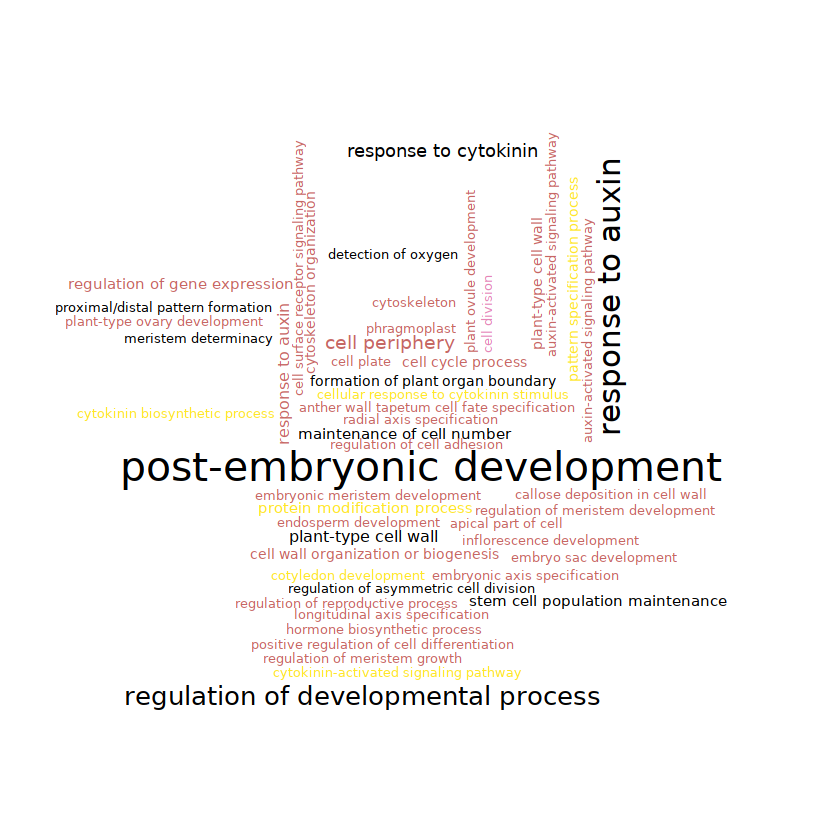

In [12]:
DD=D %>% filter( ontology=="GO") %>% select(target,name,ngenes,p.adjusted) %>% distinct()
nrow(D)
nrow(DD)

options(repr.plot.width=7, repr.plot.height=7)
wordcloud(words = DD$name, freq = DD$ngenes, min.freq = 1, scale=c(2,.6),
          max.words=200, random.order=TRUE, rot.per=0.25, 
          colors=col2[DD$target],ordered.colors=TRUE)
pdf("final_DEK1_targets.GO.selected_terms.word_cloud.pdf",width=8,height=8)
wordcloud(words = DD$name, freq = DD$ngenes, min.freq = 1, scale=c(2,.6),
          max.words=200, random.order=TRUE, rot.per=0.25, 
          colors=col2[DD$target],ordered.colors=TRUE)
dev.off()

[1] 74

[1] 24

png 
  2

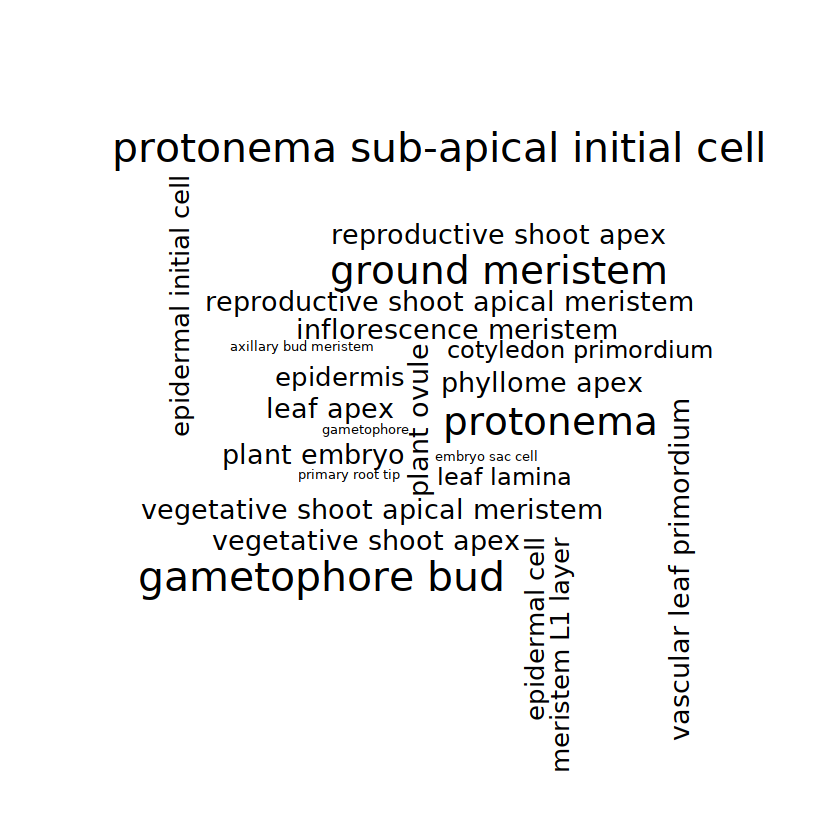

In [13]:
DD=D %>% filter( ontology=="PO") %>% select(target,name,ngenes,p.adjusted) %>% distinct()
nrow(D)
nrow(DD)

options(repr.plot.width=7, repr.plot.height=7)
wordcloud(words = DD$name, freq = DD$ngenes, min.freq = 1, scale=c(2,.6),
          max.words=200, random.order=TRUE, rot.per=0.25, 
          colors=col2[DD$target],ordered.colors=TRUE)
pdf("final_DEK1_targets.PO.selected_terms.word_cloud.pdf",width=8,height=8)
wordcloud(words = DD$name, freq = DD$ngenes, min.freq = 1, scale=c(2,.6),
          max.words=200, random.order=TRUE, rot.per=0.25, 
          colors=col2[DD$target],ordered.colors=TRUE)
dev.off()

In [16]:
D %>% filter( ontology=="GO") %>% select(target,name,ngenes,p.adjusted) %>% distinct() %>% summarize(max(p.adjusted))
D %>% filter( ontology=="PO") %>% select(target,name,ngenes,p.adjusted) %>% distinct() %>% summarize(max(p.adjusted))

max(p.adjusted)
<dbl>
0.09772206


max(p.adjusted)
<dbl>
0.06248505
